In [12]:
# generate a random hermitian matrix and random initial conditions for psi. The random initial conditions for psi will be a 
# column vector with 3 entries. 

In [13]:
import numpy as np 
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.linalg import expm

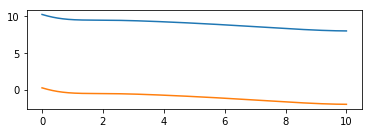

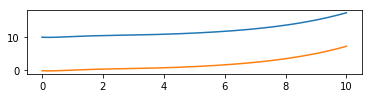

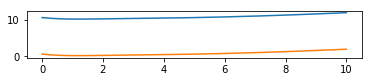

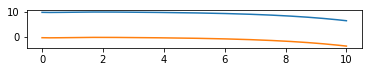

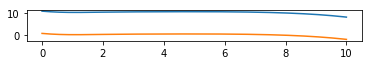

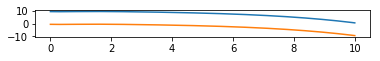

In [16]:
hamiltonian_size = 3
time_amplitude = 10
time_point_count = 1000

def right_side(time, psi, ham):
    '''This function returns an array containing the values of psi different points in time'''
    return -1j * ham.dot(psi)

time = np.linspace(0, time_amplitude, time_point_count) 
dt =  time_amplitude / time_point_count
psi_initial = rand(hamiltonian_size, 1) + -1j * rand(hamiltonian_size, 1)
h = rand(hamiltonian_size, hamiltonian_size) + -1j * rand(hamiltonian_size, hamiltonian_size)     
ham = 0.5 * (h.conj().T + h)

solver = ode(right_side).set_integrator("zvode", method = "bdf") # these are the values for psi at each time 
solver.set_initial_value(psi_initial, 0).set_f_params(h)

y = np.zeros(shape = (3, time_point_count), dtype = complex)

count = 0
while solver.successful() and solver.t < time[-1] - dt:
    y[0][count] = solver.y[0]
    y[1][count] = solver.y[1]
    y[2][count] = solver.y[2]
    count += 1
    solver.integrate(solver.t + dt)
    
    
exact = np.zeros(shape = (3, time_point_count), dtype = complex)
for i in range(3):
    for j in range(time_point_count):
        exact[i][j] = (expm(-1j * h * j * dt).dot(psi_initial)[i])
        # do i need the [0] in the above line of code.

offset = 10
# The offset is used to separate the two lines in the graphs so we can see that they are indeed the exact same curve

fig2 = plt.figure(2) 
ax2 = fig2.add_subplot(211)
ax2.plot(time, y[0].real + offset) # added 10 to show that the two functions are the same
ax2.plot(time, exact[0].real)

fig3 = plt.figure(3) 
ax3 = fig3.add_subplot(311)
ax3.plot(time, y[0].imag + offset)  # added 10 to show that the two functions are the same
ax3.plot(time, exact[0].imag)

fig4 = plt.figure(4) 
ax4 = fig4.add_subplot(411)
ax4.plot(time, y[1].real + offset)
ax4.plot(time, exact[1].real)

fig5 = plt.figure(5)
ax5 = fig5.add_subplot(511)
ax5.plot(time, y[1].imag + offset)
ax5.plot(time, exact[1].imag)

fig6 = plt.figure(6) 
ax6 = fig6.add_subplot(611)
ax6.plot(time, y[2].real + offset)
ax6.plot(time, exact[2].real)

fig7 = plt.figure(7) 
ax7 = fig7.add_subplot(711)
ax7.plot(time, y[2].imag + offset)
ax7.plot(time, exact[2].imag)